In [43]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
from sklearn.preprocessing import scale


%matplotlib inline

In [44]:
zip_f = zipfile.ZipFile('data/digits/digit-recognizer.zip','r')
zip_f.extractall('data/digits/')
zip_f.close()

!ls -la 'data/digits/'

итого 141032
drwxrwxr-x 2 sda sda     4096 июн 28 00:52 .
drwxrwxr-x 4 sda sda     4096 июн 27 23:04 ..
-rw-rw-r-- 1 sda sda 16054568 июн 27 22:43 digit-recognizer.zip
-rw-rw-r-- 1 sda sda   212908 июн 28 02:04 result.csv
-rw-rw-r-- 1 sda sda   240909 июн 28 02:11 sample_submission.csv
-rw-rw-r-- 1 sda sda 51118296 июн 28 02:11 test.csv
-rw-rw-r-- 1 sda sda 76775041 июн 28 02:11 train.csv


In [45]:
#!cat 'data/digits/train.csv'


In [18]:
df = pd.read_csv('data/digits/train.csv')
df.shape, df.columns

((42000, 785),
 Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
        'pixel6', 'pixel7', 'pixel8',
        ...
        'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
        'pixel780', 'pixel781', 'pixel782', 'pixel783'],
       dtype='object', length=785))

In [19]:
y = df.iloc[:41000,0]
X = scale(df.iloc[:41000,1:].values.reshape(41000,28,28))

y_val = df.iloc[41000:,0]
X_val = scale(df.iloc[41000:,1:].values.reshape(1000,28,28))

9 (28, 28)


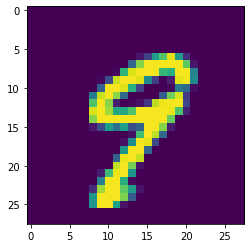

In [6]:
# попробую поизвлекать картинки
i = 11

print(y[i], X[i].shape)
plt.imshow(X[i])

In [20]:
X = X.reshape(41000,28,28,1)
X_val = X_val.reshape(1000,28,28,1)

In [53]:
# хочу сделать прикольную модельку с рюшечками с финтиклюшечками так чтобы вау

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(32, (5,5)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (3,3), input_shape=(28,28,1)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(64, (5,5)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),   
    tf.keras.layers.Dense(512, activation='relu'),    
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_5 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_6 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 10, 10, 32)       

In [54]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [55]:
model.fit(X, y, epochs=5, validation_data=(X_val,y_val))

Epoch 1/5
  24/1282 [..............................] - ETA: 7:51 - loss: 1.4876 - accuracy: 0.4844

KeyboardInterrupt: 

In [50]:
model.history.history
#loss[['loss', 'val_loss']].plot()
#loss[['accuracy', 'val_accuracy']].plot()
#loss.head()

{}

In [39]:
X_test = pd.read_csv('data/digits/test.csv')
print(X_test.shape)
X_test = X_test.values.reshape(28000,28,28,1)
print(X_test.shape)
        

(28000, 784)
(28000, 28, 28, 1)


In [40]:
prediction = model.predict(X_test)

In [41]:
df = pd.DataFrame({'ImageId': np.arange(1, X_test.shape[0]+1),
                   'Label': np.argmax(prediction, axis=-1)})
df.head()                

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [42]:
df.to_csv('data/digits/result.csv', index=False)